In [4]:
import duckdb
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Creating a Connection to a new database
con = duckdb.connect("file.db")
#Create a table and load the data 
con.sql("CREATE TABLE test1 (a INTEGER, b VARCHAR);")
con.sql("INSERT INTO test1 VALUES (1, 'one'), (2, 'two'), (3, 'three');")

#Query the table
con.table("test1").show()

con.close()

┌───────┬─────────┐
│   a   │    b    │
│ int32 │ varchar │
├───────┼─────────┤
│     1 │ one     │
│     2 │ two     │
│     3 │ three   │
└───────┴─────────┘



In [8]:
# This script demonstrates how to use DuckDB for in-memory database operations
# It creates a new in-memory database connection and sets up a mock e-commerce sales table
# The table stores order details including customer ID, product ID, quantity, price, and order date
# Sample data is inserted to simulate a small e-commerce dataset for analysis
#Creating a Connection to a E-Commerce database
ecom = duckdb.connect(":memory:")

#Creating Mock Data to test the database
ecom.execute("""CREATE TABLE sales(
    order_id INTEGER,
    customer_id INTEGER,
    product_id INTEGER,
    quantity INTEGER,
    price DECIMAL(10,2),
    order_date DATE
);""")

ecom.execute("""INSERT INTO sales VALUES
    (1, 101, 501, 1, 10.00, '2020-01-01'),
    (2, 102, 502, 2, 20.00, '2020-01-02'),
    (3, 103, 503, 4, 10.00, '2020-01-02'),
    (4, 104, 504, 12, 30.00, '2020-01-03'),
    (5, 105, 505, 6, 30.00, '2020-01-03'),
    (6, 106, 506, 1, 40.00, '2020-01-04'),
    (7, 107, 507, 8, 50.00, '2020-01-05'),
    (8, 108, 508, 4, 60.00, '2020-01-06'),
    (9, 109, 509, 3, 70.00, '2020-01-07')
             
            
""")




In [10]:
#Run Analytical Queries
monthly_sales = ecom.execute("""
SELECT
    strftime('%Y-%m', order_date) AS month,
    SUM(quantity) AS total_quantity,
    SUM(price * quantity) AS revenue,
    COUNT(order_id) AS total_orders
FROM
    sales
GROUP BY
    month
ORDER BY
    month;
""").fetchdf()

print(monthly_sales)

     month  total_quantity  revenue  total_orders
0  2020-01            41.0   1520.0             9


/tmp/ipykernel_9278/1480770046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='revenue', data=monthly_sales, palette='viridis')


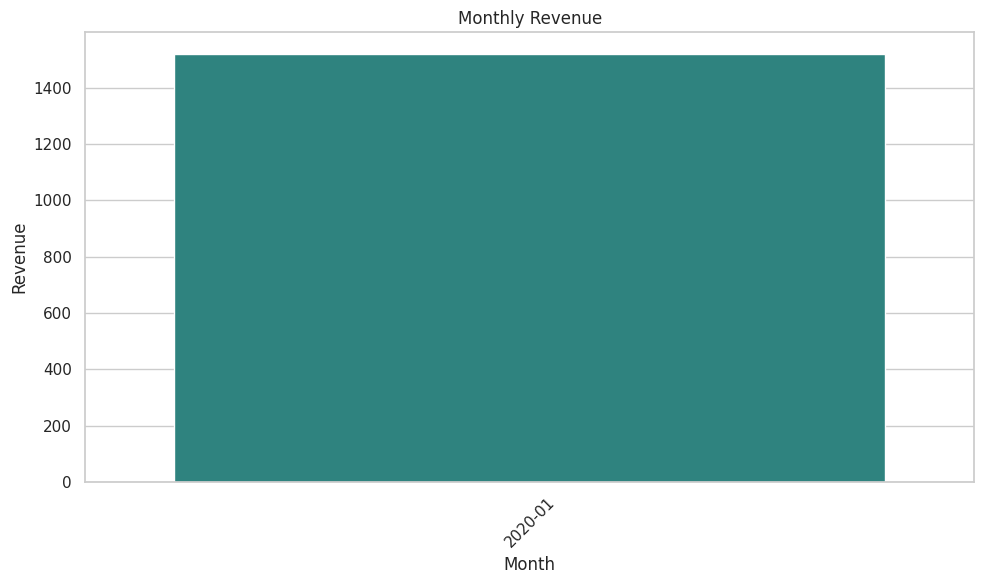

In [11]:
#Visualize the data
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='revenue', data=monthly_sales, palette='viridis')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()